<a target="_blank" href="https://colab.research.google.com/github/rcabanasdepaz/ME-BigData/blob/main/MetropolisHastings/regresion_lineal_mh.ipynb">  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejemplo con Metropolis Hastings: Regresión Lineal

## Generación de datos

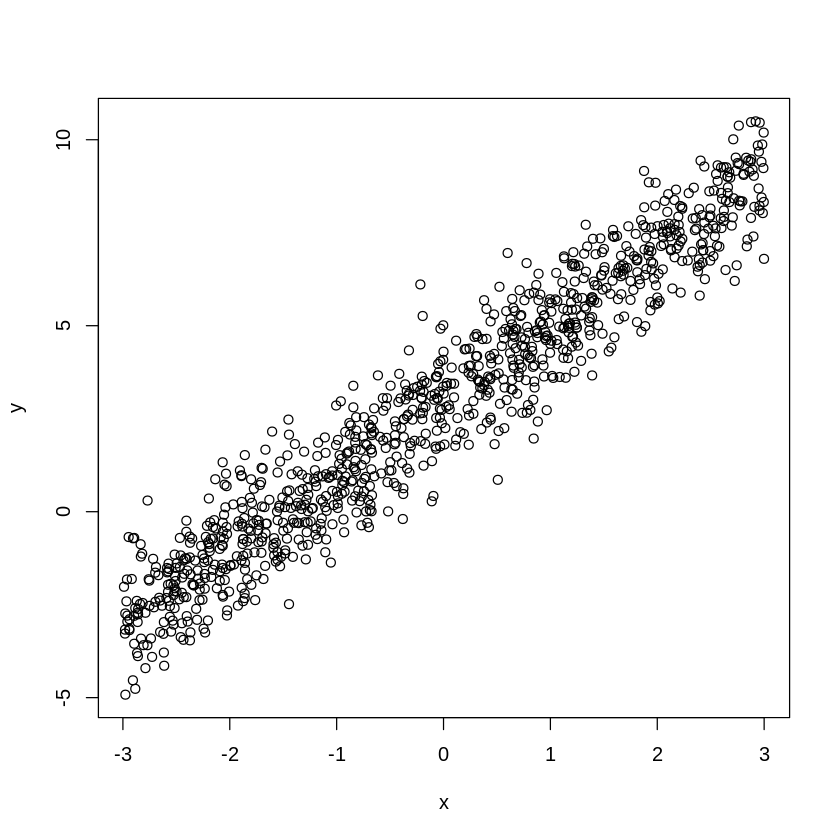

In [1]:

n=1000
x = runif(n,-3,3)
y = 2*x + 3 + rnorm(n,0,1)
plot(x,y)


## Aprendizaje Bayesiano

En primer lugar, definimos una función que devuelva la probabilidad conjunta representada por el modelo jerárquico. Ésta será nuestra función proporcional $q(\boldsymbol x)$:

In [2]:

dreg_lineal <- function(x_i,y_i,w0,w1,epsilon,mu0,sd0,mu1,sd1){
  dnorm(w0, mu0, sd0) * dnorm(w1, mu1, sd1) * dnorm(y_i, w0+ w1*x_i+epsilon,sqrt(sd0^2+sd1^2*x_i^2+1)) * dnorm(epsilon, 0,1)
}



Definimos una función que genere una secuencia de Markov para las variables ocultas $W_0$, $W_1$ y $\varepsilon$,a partir de un valor inicial. Esto lo hará para para un valor fijo de $x,y,\mu_0,\sigma_0,\mu_1,\sigma_1$.

In [3]:

MH_sample <- function(n_points, sample0, x_i, y_i, mu0,sd0,mu1,sd1) {
  S = matrix(0, nrow=n_points, ncol=length(sample0), byrow=TRUE)
  colnames(S)=c("w0","w1","epsilon")

  for (t in 2:n_points) {
    w0_prop = rnorm(1,S[t-1,"w0"],1)

    alpha = dreg_lineal(x_i,y_i, w0_prop,   S[t-1, "w1"],S[t-1, "epsilon"],mu0,sd0,mu1,sd1) /
            dreg_lineal(x_i,y_i, S[t-1, "w0"],S[t-1, "w1"],S[t-1, "epsilon"],mu0,sd0,mu1,sd1)


    S[t,"w0"] = ifelse(runif(1)<=alpha, w0_prop, S[t-1,"w0"])




    w1_prop = rnorm(1,S[t-1,"w1"],1)
    alpha = dreg_lineal(x_i,y_i, S[t, "w0"], w1_prop,  S[t-1, "epsilon"],mu0,sd0,mu1,sd1) /
            dreg_lineal(x_i,y_i, S[t, "w0"],S[t-1, "w1"],S[t-1, "epsilon"],mu0,sd0,mu1,sd1)

    S[t,"w1"] = ifelse(runif(1)<=alpha, w1_prop, S[t-1,"w1"])



    eps_prop = rnorm(1,S[t-1,"epsilon"],1)
    alpha = dreg_lineal(x_i,y_i, S[t, "w0"],S[t, "w1"],  eps_prop,    mu0,sd0,mu1,sd1) /
            dreg_lineal(x_i,y_i, S[t, "w0"],S[t, "w1"],S[t-1, "epsilon"],mu0,sd0,mu1,sd1)

    S[t,"epsilon"] = ifelse(runif(1)<=alpha, eps_prop, S[t-1,"epsilon"])
  }

  return(S)
}



Para cada $x,y$ en nuestro dataset, generamos una muestra con el algoritmo anterior y actualizamos los hiper-parámetros.

In [4]:

# A priori de w0, N(mu0,sigma = sd0)
mu0 = 0
sd0 = 1
# A priori de w1, N(mu1,sgima = sd1)
mu1 = 0
sd1 = 1

sample0 = c(0,0,0)


# Parámetros de la inferencia (muestreo por importancia)
K=5000         # número de muestras
M = 70     # número de iteraciones


i = 1
for (i in 1:M) {

  S = MH_sample(K, sample0, x[i], y[i],mu0,sd0, mu1,sd1)


  est_w0 = mean(S[,"w0"])
  est_w0_2 = mean(S[,"w0"]^2)
  mu0 = est_w0
  sd0 = sqrt(est_w0_2-est_w0^2)

  est_w1 = mean(S[,"w1"])
  est_w1_2 = mean(S[,"w1"]^2)
  mu1 = est_w1
  sd1 = sqrt(est_w1_2-est_w1^2)


  if(i%%5==0){
    cat('Data item no.: ',i,'\n')
    cat('mu0=',mu0,' ; sd0=',sd0,'\n')
    cat('mu1=',mu1,' ; sd1=',sd1,'\n')
  }
}


Data item no.:  5 
mu0= 1.272425  ; sd0= 0.6919009 
mu1= 1.70446  ; sd1= 0.4949437 
Data item no.:  10 
mu0= 2.396712  ; sd0= 0.5463907 
mu1= 2.164211  ; sd1= 0.3302456 
Data item no.:  15 
mu0= 2.711162  ; sd0= 0.4674153 
mu1= 2.206026  ; sd1= 0.3773907 
Data item no.:  20 
mu0= 2.563298  ; sd0= 0.3943704 
mu1= 2.061493  ; sd1= 0.3074156 
Data item no.:  25 
mu0= 2.637828  ; sd0= 0.366547 
mu1= 1.956858  ; sd1= 0.2617888 
Data item no.:  30 
mu0= 2.689294  ; sd0= 0.3732658 
mu1= 2.072171  ; sd1= 0.2282193 
Data item no.:  35 
mu0= 2.645111  ; sd0= 0.3618615 
mu1= 2.026318  ; sd1= 0.2508124 
Data item no.:  40 
mu0= 2.8243  ; sd0= 0.3810533 
mu1= 2.023019  ; sd1= 0.2243461 
Data item no.:  45 
mu0= 2.998495  ; sd0= 0.3686808 
mu1= 1.94076  ; sd1= 0.2406221 
Data item no.:  50 
mu0= 2.94441  ; sd0= 0.3675892 
mu1= 1.910853  ; sd1= 0.1987739 
Data item no.:  55 
mu0= 2.739387  ; sd0= 0.3625552 
mu1= 1.922825  ; sd1= 0.232707 
Data item no.:  60 
mu0= 2.919266  ; sd0= 0.3607269 
mu1= 1.89

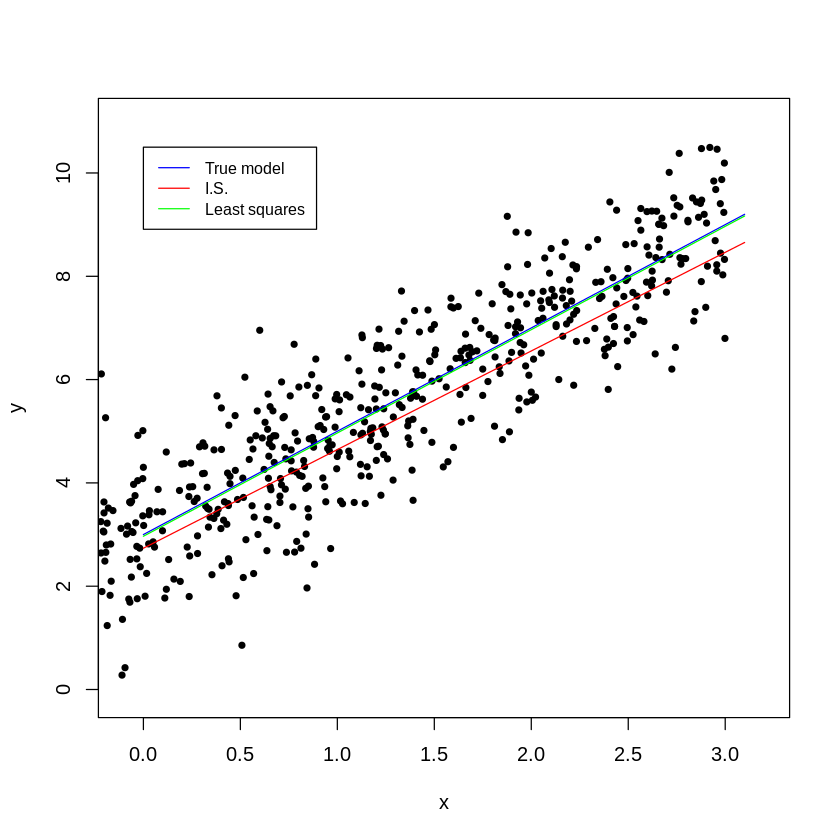

In [5]:

plot(x,y,xlim=c(-0.1,3.2),ylim=c(-0.1,11),pch=20)
curve(2*x+3, from = 0, to = 3.1, add=T, col = 'blue')
curve(mu1*x+mu0, from = 0, to = 3.1, add=T, col = 'red')
linM = lm(y~x)
curve(linM$coefficients[1]+linM$coefficients[2]*x, from = 0, to = 3.1, add=T, col = 'green')
legend(0, 10.5, legend= c('True model','I.S.','Least squares'), col=c('blue','red','green'),lty=1, cex=0.8)





## Metropolis-Hastings en detall

A continuación, mostramos cómo Metropolis-Hastings genera la primera muestra

In [17]:
set.seed(1)
n_points = 2
sample0 = c(0,0,0)
y_i = y[1]
x_i = x[1]
S = matrix(0, nrow=n_points, ncol=length(sample0), byrow=TRUE)
colnames(S)=c("w0","w1","epsilon")
t=2

In [18]:
w0_prop = rnorm(1,S[t-1,"w0"],1)

alpha = dreg_lineal(x_i,y_i, w0_prop,   S[t-1, "w1"],S[t-1, "epsilon"],mu0,sd0,mu1,sd1) /
  dreg_lineal(x_i,y_i, S[t-1, "w0"],S[t-1, "w1"],S[t-1, "epsilon"],mu0,sd0,mu1,sd1)
u = runif(1)
S[t,"w0"] = ifelse(u<=alpha, w0_prop, S[t-1,"w0"])

### Muestra información ###
print(paste("Valor propuesto w0* =",w0_prop))
print(paste("alpha=",alpha))
print(paste("u=",u))
print(paste("Aceptado=",u<alpha))
print(paste("nuevo valor=",S[t,"w0"]))




[1] "Valor propuesto w0* = -0.626453810742332"
[1] "alpha= 2.77542076901382e-08"
[1] "u= 0.572853363351896"
[1] "Aceptado= FALSE"
[1] "nuevo valor= 0"


In [19]:
w1_prop = rnorm(1,S[t-1,"w1"],1)
alpha = dreg_lineal(x_i,y_i, S[t, "w0"], w1_prop,  S[t-1, "epsilon"],mu0,sd0,mu1,sd1) /
  dreg_lineal(x_i,y_i, S[t, "w0"],S[t-1, "w1"],S[t-1, "epsilon"],mu0,sd0,mu1,sd1)
u = runif(1)
S[t,"w1"] = ifelse(u<=alpha, w1_prop, S[t-1,"w1"])


### Muestra información ###
print(paste("Valor propuesto w1* =",w1_prop))
print(paste("alpha=",alpha))
print(paste("u=",u))
print(paste("Aceptado=",u<alpha))
print(paste("nuevo valor=",S[t,"w1"]))


[1] "Valor propuesto w1* = 1.3297992629225"
[1] "alpha= 2313551376944.59"
[1] "u= 0.898389684967697"
[1] "Aceptado= TRUE"
[1] "nuevo valor= 1.3297992629225"


In [20]:
eps_prop = rnorm(1,S[t-1,"epsilon"],1)
alpha = dreg_lineal(x_i,y_i, S[t, "w0"],S[t, "w1"],  eps_prop,    mu0,sd0,mu1,sd1) /
  dreg_lineal(x_i,y_i, S[t, "w0"],S[t, "w1"],S[t-1, "epsilon"],mu0,sd0,mu1,sd1)

u = runif(1)
S[t,"epsilon"] = ifelse(u<=alpha, eps_prop, S[t-1,"epsilon"])


### Muestra información ###
print(paste("Valor propuesto epsilon* =",eps_prop))
print(paste("alpha=",alpha))
print(paste("u=",u))
print(paste("Aceptado=",u<alpha))
print(paste("nuevo valor=",S[t,"epsilon"]))

[1] "Valor propuesto epsilon* = 1.59528080213779"
[1] "alpha= 1.17071783941469"
[1] "u= 0.62911404389888"
[1] "Aceptado= TRUE"
[1] "nuevo valor= 1.59528080213779"
